# Matplotlib fundemental

In [5]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


# EDA

In [6]:
df.shape # long table

(4377, 5)

In [ ]:
df.head()

Year          11
Month         12
Make          65
Quantity    1070
Pct          184
dtype: int64

In [7]:
df.head(10)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [8]:
df.head().T

,0,1,2,3,4
Year,2007,2007,2007,2007,2007
Month,1,1,1,1,1
Make,Toyota,Volkswagen,Peugeot,Ford,Volvo
Quantity,2884,2521,1029,870,693
Pct,22.7,19.9,8.1,6.9,5.5


In [9]:
import duckdb

df_quantity_brand = duckdb.query("""
SELECT 
    make AS Brand,
    SUM(quantity) AS Quantity
    FROM df
    GROUP BY
        make
    ORDER BY
        quantity
    DESC
""").df()

df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


# Bar chart

<Axes: xlabel='Brand'>

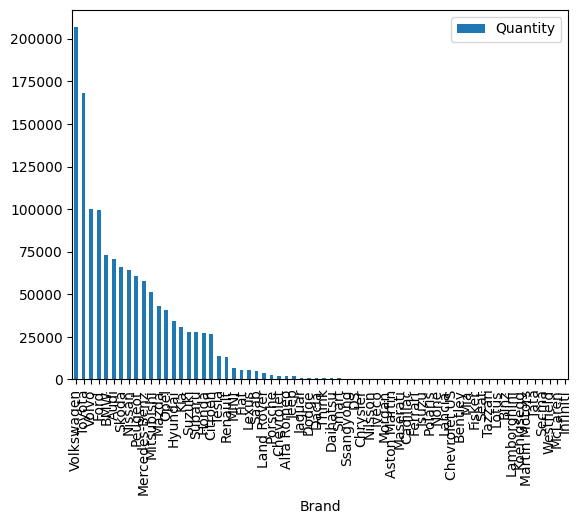

In [10]:
# using dataframes plot method which is a wrapper for matplotlib
df_quantity_brand.plot(kind = "bar", x = "Brand", y = "Quantity")

# Plot top 5 most popular brands

<Axes: xlabel='Brand'>

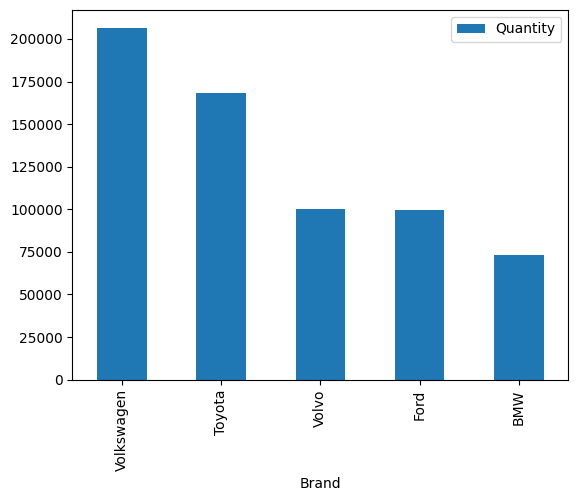

In [11]:
df_quantity_brand.head().plot(kind = "bar", x = "Brand", y = "Quantity")

<Axes: xlabel='Brand'>

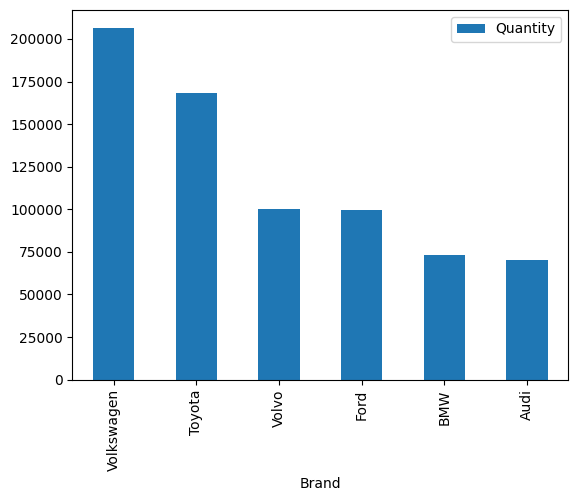

In [33]:
df_quantity_brand.iloc[:6].plot(kind = "bar", x = "Brand", y = "Quantity")

# Matplotlib bar

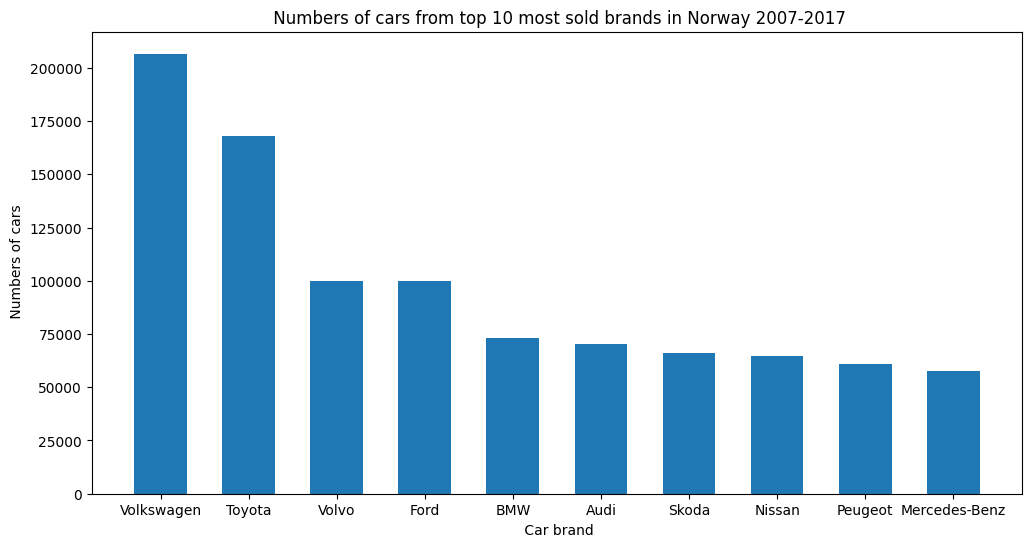

In [13]:
import matplotlib.pyplot as plt


df_quantity_top_10 = df_quantity_brand.iloc[:10]
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(
    x = df_quantity_top_10["Brand"],
    height = df_quantity_top_10["Quantity"],
    width= 0.6,
)

ax.set(title=" Numbers of cars from top 10 most sold brands in Norway 2007-2017", 
       xlabel= " Car brand", 
       ylabel=" Numbers of cars")

fig.savefig("figures/bars_top_10_cars.png")

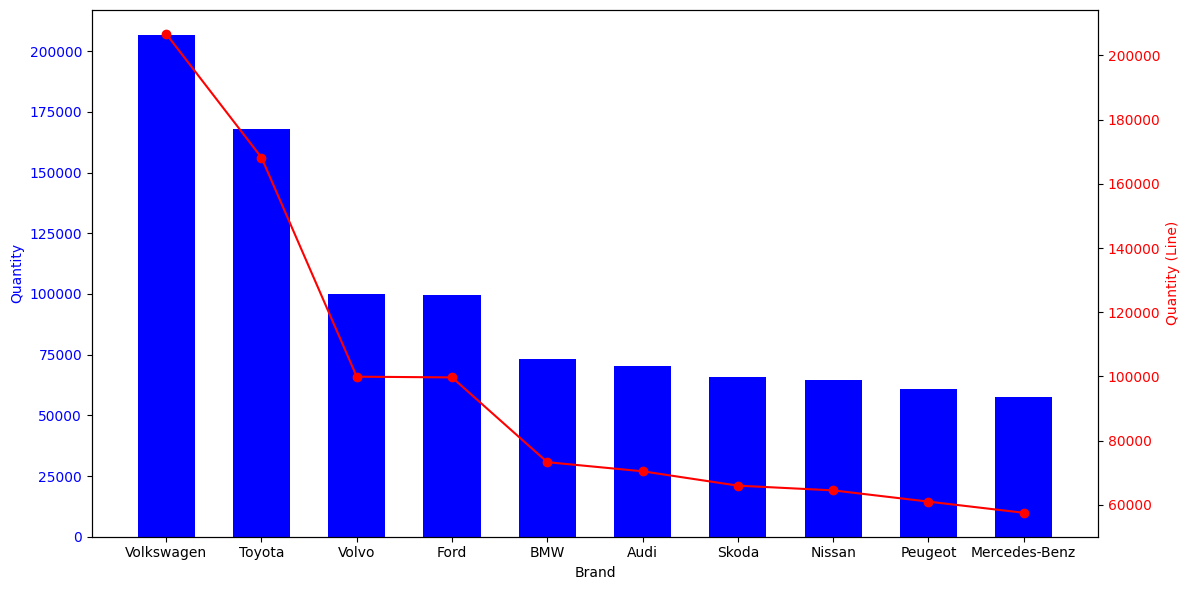

In [27]:
import matplotlib.pyplot as plt

# Skapa figur och axlar
fig, ax1 = plt.subplots(figsize=(12, 6))

# Skapa stapeldiagram på ax1
ax1.bar(
    x = df_quantity_top_10["Brand"],
    height = df_quantity_top_10["Quantity"],
    width = 0.6,
    color = 'b'  # För att ge staplarna en färg (blå)
)

# Sätt etiketter och titel för ax1
ax1.set_xlabel('Brand')
ax1.set_ylabel('Quantity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Skapa en andra y-axel (twinx)
ax2 = ax1.twinx()

# Här kan du exempelvis plotta en linje (eller annat) på den andra y-axeln
# Här används en linje som exempel:
ax2.plot(df_quantity_top_10["Brand"], df_quantity_top_10["Quantity"], color='r', marker='o')

# Sätt etiketter och titel för ax2
ax2.set_ylabel('Quantity (Line)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Justera layouten
plt.tight_layout()

# Visa grafen
plt.show()


# Line Chart

In [21]:
df_quantity_year = duckdb.query("""
    SELECT
        year, SUM(quantity) AS Quantity
    FROM df
    GROUP BY year
    ORDER BY 
        year 
""").df().set_index("Year")

df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

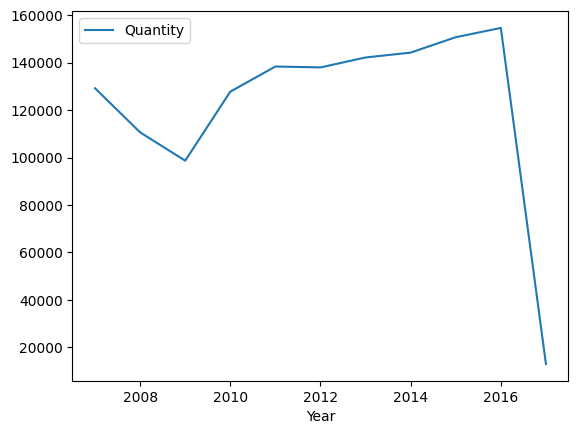

In [22]:
df_quantity_year.plot()

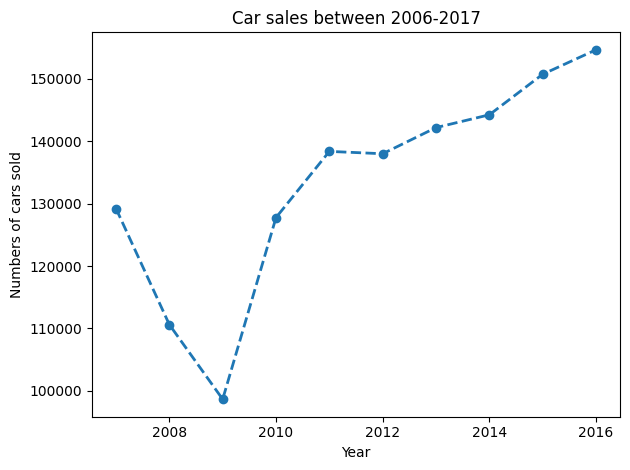

In [45]:
ax = df_quantity_year.iloc[:-1].plot(
    title="Car sales between 2006-2017",
    xlabel= "Year",
    ylabel= "Numbers of cars sold",
    style= "--o",
    linewidth =2)

ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_line.png")


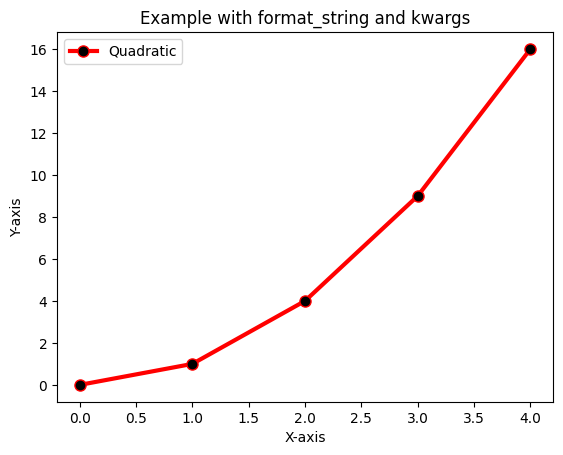

In [39]:

# Data for plotting
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

# Plot with format_string and kwargs
plt.plot(x, y, 'r-', label='Quadratic', linewidth=3, markersize=8, marker='o', markerfacecolor='black')

# Add title and labels
plt.title('Example with format_string and kwargs')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()

# Show the plot
plt.show()
